In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

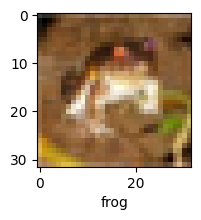

In [ ]:
plot_sample(x_train,y_train,0)

normalize the data

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.3077 - loss: 1.9258
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.4162 - loss: 1.6471
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 83ms/step - accuracy: 0.4547 - loss: 1.5447
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 84ms/step - accuracy: 0.4778 - loss: 1.4874
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 86ms/step - accuracy: 0.4961 - loss: 1.4360


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classsification report: \n',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
classsification report: 
               precision    recall  f1-score   support

           0       0.54      0.55      0.55      1000
           1       0.63      0.63      0.63      1000
           2       0.33      0.44      0.38      1000
           3       0.36      0.27      0.31      1000
           4       0.32      0.57      0.41      1000
           5       0.43      0.31      0.36      1000
           6       0.49      0.56      0.52      1000
           7       0.64      0.43      0.51      1000
           8       0.69      0.54      0.60      1000
           9       0.63      0.49      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [ ]:
import seaborn as sns

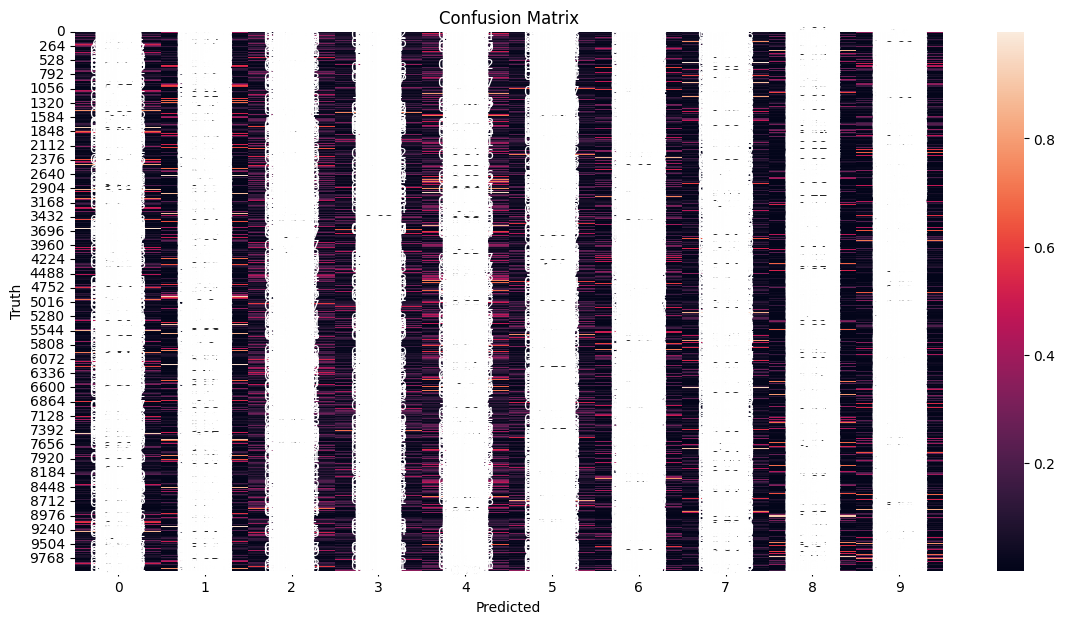

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.3685 - loss: 1.7367
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.5956 - loss: 1.1615
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 54ms/step - accuracy: 0.6488 - loss: 1.0120
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 45ms/step - accuracy: 0.6795 - loss: 0.9208
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 41ms/step - accuracy: 0.7049 - loss: 0.8597
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7261 - loss: 0.7942
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7413 - loss: 0.7494
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7569 - loss: 0.7054
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7694 - loss: 0.6630
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7794 - loss: 0.6353


In [ ]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6998 - loss: 0.9181


[0.9252320528030396, 0.6959999799728394]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[1.10958715e-03, 1.99440274e-05, 4.62355092e-03, 6.86948121e-01,
        5.74151927e-04, 1.15643524e-01, 1.46351397e-01, 2.30691687e-04,
        4.16592509e-02, 2.83981441e-03],
       [3.12069402e-04, 1.14004244e-03, 1.86259949e-05, 4.27073104e-07,
        6.09214203e-06, 4.32388667e-08, 8.82394659e-07, 5.19573995e-10,
        9.98475015e-01, 4.68018625e-05],
       [8.53162725e-03, 1.15951203e-01, 9.56219388e-04, 3.88045772e-03,
        9.02480446e-04, 4.53142449e-04, 4.24157333e-04, 3.87949753e-04,
        7.08648860e-01, 1.59863874e-01],
       [4.81442481e-01, 1.29774993e-03, 1.62015446e-02, 7.51880580e-04,
        5.21587383e-04, 7.55722158e-06, 8.31091602e-04, 1.30853341e-05,
        4.98918504e-01, 1.45135409e-05],
       [9.64618266e-07, 3.43492902e-05, 1.66761857e-02, 5.37430681e-02,
        1.82863876e-01, 5.73720410e-03, 7.40797937e-01, 1.14229224e-04,
        3.08946001e-05, 1.25480176e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(8), np.int64(6)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

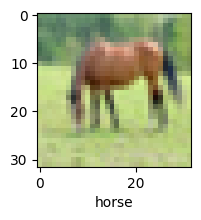

In [ ]:
plot_sample(x_test,y_test,60)

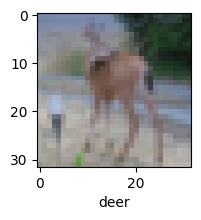

In [ ]:
plot_sample(x_test,y_test,100)

In [ ]:
classes[y_classes[60]]

'horse'